EE 502 P: Analytical Methods
# 2: Mathematical Preliminaries
## Prof. Eric Klavins, Electrical and Computer Engineering

### Tamara Bonaci, Department of Electrical and Computer Engineering
### October 2, 2024
Copyright &copy; 2024, University of Washington

In this lecture, we will describe the fundamental objects of mathematics: Sets, relations, functions, and cardinality. Understanding these concepts are the key to mathematical literacy. For this lecture, we will follow the **chapter one** of the following textbook fairly closely:

> [An Introduction to Real Analysis](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/ch1.pdf) by John K. Hunter,

which is available for free online.

Rather than repeating that chapter in this notebook, we will present our own take on the subject at the whiteboard using the following outline.

- Sets
  - Defs: sets, elements, the empty set
  - Representation: finite, with ellipses, in words, set builder
  - Examples
    - Finite sets of numbers, strings, other sets,
    - Naturals, integers, rationals, reals, complexes
  - Subsets, Equality (in terms of subsets)
  - The power set and an example
  - Intersection, union, difference, complement (universe)
  - Cartesian products, tuples
  - Example: Dice, two dice, two dice summing to 7
  - $\mathbb{R}^n$ and vector notation
  - Set proofs
    - What is a proof?
    - $ (A \cap B) \subseteq A$
    - $A \cup ( B \cap C ) = (A \cup B) \cap (A \cup C)$
- Functions
  - Definition (and synonyms). domain, codomain
  - As a list of tuples, the identity function, characteristic function
  - Example functions on $\mathbb{Z}$
  - Graph of a function as a subset of domain cross co-domain
  - Range, surjection (onto), injection(1-1), bijection
  - Note positive proofs vs negative counterexamples
  - Examples: Which of the above are surjections, injections, and/or bijections?
  - Composition and inverse, definition, domains, and codomains
  - Examples from real numbers
- Relations
  - Definitions
  - Examples
    - List of tuples, "has read", has a common factor
    - Function graphs are relations, but not conversely (in general)
  - Order relations
    - Less than, subset, divides
  - Equivalence relations
    - reduces to (for fractions), equal mod
- Cardinality, and types of infinity
  - Countable
    - Definition
    - Examples: Even numbers, rationals
  - Uncountable
    - Reals
    - [0,1]
    - Binary sequences
    - Functions from {0,...,9} to {0,...,9}
  - Uncomputable functions

We will then discuss how to represent sets, relations, functions and cardinality in Python using the remainder of this notebook.

In [1]:
import math
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

# Sets

Python has a built-in set object, which is documented here:

> https://docs.python.org/2/library/stdtypes.html#set

It is intended for representing finite sets of objects. Note that these objects are *not* the same as lists. There is no implicit ordering and each element can only show up once.

All of the standard relations and operations on sets are supported, including $\in$, $\subseteq$, $=$, $\cap$, $\cup$, and $-$. In addition, you can use `len` to get the size of the set.

To construct sets, you can simply use curly braces. You can also create sets from lists and lists from sets, using `set(L)` and `list(S)` where `L` is a list and `S` is a set.

Sets can be constructed with comprehensions, just like lists. Use curly braces instead of square brackets.

The empty set is constructed using `set()` (i.e. with no arguments).

In [2]:
# Listing elements

A = { 1, 2, 3, 3, 3, 3, 3, 3, 4, 4, 5}
A, type(A), len(A)

({1, 2, 3, 4, 5}, set, 5)

In [3]:
# The empty set

E = {}
E, len(E)
F = set()
"My other set", F, len(F)

('My other set', set(), 0)

In [4]:
# Using a set comprehension, which is like set builder notation

B = { x for x in range(10) if x%2 != 0 }
B

{1, 3, 5, 7, 9}

In [5]:
# Checking whether an element is in a set
1 in A, 3 not in B

(True, False)

In [6]:
# Set relations

print(A.intersection(B))
print(A.union(B))
print(A.difference(B))
print(B.difference(A))
print(A.isdisjoint(B))
print({3,5}.issubset(B))
print({3,5} <= B) # equivalent

D1 = A.symmetric_difference(B)
D2 = A.union(B).difference(A.intersection(B))
D1, D2, D1 == D2

{1, 3, 5}
{1, 2, 3, 4, 5, 7, 9}
{2, 4}
{9, 7}
False
True
True


({2, 4, 7, 9}, {2, 4, 7, 9}, True)

In [7]:
# Removing elements
print(A)
a = A.pop()
a, A

{1, 2, 3, 4, 5}


(1, {2, 3, 4, 5})

In [8]:
# Adding elements

A.add(12)
A

{2, 3, 4, 5, 12}

In [9]:
# Copying

C = A.copy()
A.remove(12)
A.discard(2)
A, C

({3, 4, 5}, {2, 3, 4, 5, 12})

In [10]:
C.clear()
C

set()

In [11]:
# To do the cartesian product, you can define a function
# Try: Define a function that takes a list of sets and returns their n-fold cartesian product

def cartesian_product(X,Y):
    return {(x,y) for x in X for y in Y}

In [12]:
# Dice example

die = {1,2,3,4,5,6}
twodice = cartesian_product(die,die)
seven = { p for p in twodice if p[0] + p[1] == 7 }
print(twodice, "\n")
print(seven)

{(3, 4), (4, 3), (3, 1), (5, 4), (4, 6), (5, 1), (2, 2), (1, 6), (2, 5), (1, 3), (6, 2), (6, 5), (4, 2), (4, 5), (3, 3), (5, 6), (3, 6), (5, 3), (2, 4), (1, 2), (2, 1), (1, 5), (6, 1), (6, 4), (3, 2), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (1, 1), (1, 4), (2, 3), (2, 6), (6, 6), (6, 3)} 

{(3, 4), (4, 3), (6, 1), (1, 6), (2, 5), (5, 2)}


In [13]:
# Sets of sets: This won't work becuase Python sets need to have immutable elements.
# But with the definition below, if you had a variable pointing to {1,2} you could change it,
# thereby changing the set.

A = {1,2}
S = { A }
A.add(3)
S

TypeError: unhashable type: 'set'

In [14]:
# To solve this problem, you use the built in type `frozenset`, which supports
# all the functions that `set` does, except for those that modify the set.

A = {1,2}
S = { frozenset(A) }
S

{frozenset({1, 2})}

### The Power Set

The Power Set is also easy to define. This definition uses recursion. In particular,
we use the fact that the power set of $S$ is equal to the set of sets resulting from removing
a single element from $S$, unioned together with the their power sets. That is,

$$
\mathcal{P}(S) = \{ S \} \cup \bigcup_{x \in S} \{ S - \{x\} \} \cup \mathcal{P}(S - \{x\})
$$

In [15]:
def power_set(S):
    P = set()
    P.add(frozenset(S))
    for x in S:
        T = S.copy()
        T.remove(x)
        P = P.union(power_set(T))
    return P

S = {1,2,3,4}
for s in power_set(S):
    print(set(s))

{1, 4}
{2, 3, 4}
{2, 3}
{1, 2, 3}
{1}
{1, 2, 3, 4}
{4}
{3, 4}
{2}
{1, 2, 4}
{1, 2}
{3}
{2, 4}
set()
{1, 3}
{1, 3, 4}


# Tuples

In [16]:
# Tuples are a built in type in Python. You can treat them somewhat like lists.

x = (1,2,3)
y = (4,5,6)
S = { x, y }
print("S =", S )
print("x =", x )
print("x[0] =", x[0])

S = {(1, 2, 3), (4, 5, 6)}
x = (1, 2, 3)
x[0] = 1


In [17]:
# Python supports multiple assignments in one step using tuples (or lists for that matter)

a,b,c = x
print(a)
print(b)
print(c)

1
2
3


# Relations

In [18]:
# Recall that a relation is just a set of tuples.

R = {
    (1,2),
    (2,3),
    (3,4)
}

# This is how you have to write 1 R 3 and 1 R 2
(1,3) in R, (1,2) in R

(False, True)

In [19]:
# Of course, Python has all sorts of relations predefined

1 < 2
4 != 5

True

In [20]:
# Since Python's relations are on (essentially) infinite sets, they are defined as functions.
# You can also define relations in infinte sets. Such definitions take a pair of elements and
# return true or false.

def divides(x,y):
    return x != y and x != 0 and y % x == 0

divides(3,12)

True

In [21]:
# ... and combined with set builder notation

n = 20
D = { (x,y) for x in range(1,n) for y in range(1,n) if divides(x,y)}
D

{(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13 ↪

↪ ), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 4), (2, 6), (2, 8), (2, 10), (2, 12 ↪

↪ ), (2, 14), (2, 16), (2, 18), (3, 6), (3, 9), (3, 12), (3, 15), (3, 18), (4, 8), (4, 12), (4, 16 ↪

↪ ), (5, 10), (5, 15), (6, 12), (6, 18), (7, 14), (8, 16), (9, 18)}

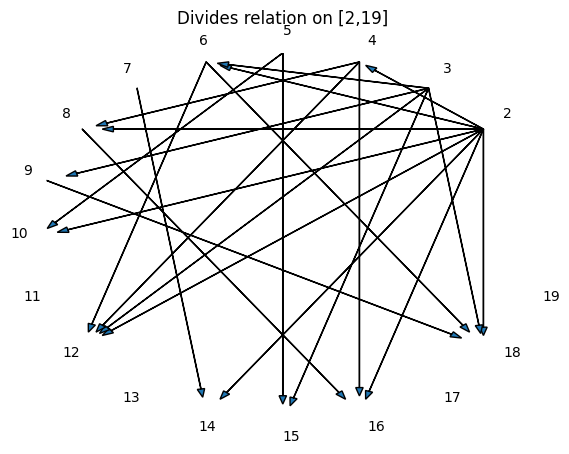

In [22]:
# ... and plotted. The is a common way to draw finite relations, with arrows from a to b
# for every (a,b) in R.

points = [
    (
        math.cos(2*math.pi*i / n),
        math.sin(2*math.pi*i / n)
    ) for i in range(1,n)
]

for i,p in enumerate(points):
    if i != 0:
        plt.text(1.1*p[0],1.1*p[1],i+1)

for x in range(1,n):
    for y in range(1,n):
        if x != 1 and (x,y) in D:
            plt.arrow(
                points[x-1][0],
                points[x-1][1],
                0.95*(points[y-1][0] - points[x-1][0]),
                0.95*(points[y-1][1] - points[x-1][1]),
                head_width=0.03,
                length_includes_head=True)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis("off");
plt.title("Divides relation on [2,19]\n");

In [23]:
# A predecessor of y with respect to the relation R is the set { x | x R y }
# The elements that only have 1 as predecessor in the relation are prime

def preds(y):
    return { x for x in range(n) if (x,y) in D }

{ y for (x,y) in D if len(preds(y)) == 1 }

{2, 3, 5, 7, 11, 13, 17, 19}

# Functions

In [24]:
# In Python you can represent functions with a finite numbner of elements as dictionaries

f = { 1: 2, 2: 3 }
f[1]

2

In [25]:
# Note that the dictionary format prevents you from mapping a single element to two elements in the range

f = { 1: 2, 1: 3 }
f

{1: 3}

In [26]:
# You can compute the domain and range of a function

def domain(F):
    return set(F.keys())

def frange(F):
    return set(F.values())

f = {1: 2, 2: 3}

domain(f), frange(f)

({1, 2}, {2, 3})

In [27]:
# You can write a simple function to compute the composition of two functions

def compose(F, G):
    H = {}
    for x in domain(F):
        H[x] = G[F[x]]
    return H


f = {1: 2, 2: 3}
g = {2: 20, 3: 30}
compose(f,g)

{1: 20, 2: 30}

### Functions in Python

Of course, functions in Python are defined using `def`. They can actually be treated as objects as well, and passed around as arguments, and so on.

Another way to define functions is with a `lambda` expression, a concept available in most programming languages. This is used when you may not want to name the function, or if you need to write a function that returns another function.

In [28]:
def F(x):
    return x + 1

In [29]:
# Lambda example

F = lambda x : x + 1

F(123)

124

In [30]:
# Using this idea, we can convert a dictionary into a full fledged lambda function.

def dict_to_function(F):
    return lambda x : F[x] if x in domain(F) else None

F = dict_to_function(f)

In [31]:
type(f), type(F)

(dict, function)

In [32]:
f[1], F(2)

(2, 3)

In [33]:
FOG = dict_to_function(compose(f,g))
FOG(2)

30

In [34]:
(lambda x, y : x + y)(45,123)

168

In [35]:
type(lambda x, y : x + y)

function

# Numbers

In [36]:
# The set Z of Integers is formally represented via sympy. But you can also just use
# Python ints, but they have size limits.

import sympy as sm

sm.Integer(1)

1

In [37]:
# Rationals

sm.Rational(1,2)

1/2

In [38]:
# Algebraic and not rational

sm.sqrt(2)

√2

In [39]:
# Transcendental

sm.pi, sm.E

(π, ℯ)

In [40]:
# Working with transcendental numbers
# And my favorite equation

sm.E**(sm.pi * sm.I) == -1

True

# Interesting Sets

In [41]:
# Python programs

import ast

def is_python(expr):
    try:
        ast.parse(expr)
        return True
    except:
        return False

chars = '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '
strings = chars
p = { expr for expr in s if is_python(expr) }

strings = [s + c for s in strings for c in chars]
p = p.union({ s for s in strings if is_python(s)})

strings = [s + c for s in strings for c in chars]
p = p.union({ s for s in strings if is_python(s)})

"f()" in p

True